# worksheet 10: Plotting

### Plots
You will explore:
- built in plotting capabilities with pandas
- use matplotlib
- use seaborn
- use the `genes_transcripts.csv` data


In [1]:
# install matplotlib and seaborn in the terminal before launching jupyter lab
# ensure you're in the virtualenv 3.12.7
# pip install matplotlib
# pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### read genes_transcripts.csv file

In [8]:
gene_tx_df = pd.read_csv('genes_transcripts.csv')

In [12]:
gene_tx_df.head()

,transcripts,biotype,start,id,external_name,seq_region_name,end,strand,gene_name,tx_length
0,transcript_0,processed_pseudogene,43079302,ENST00000497954,RPL21P4-201,17,43079780,1,BRCA1,478
1,transcript_1,transcribed_unprocessed_pseudogene,43131208,ENST00000587322,NaN,17,43131270,1,BRCA1,62
2,transcript_2,transcribed_processed_pseudogene,43144956,ENST00000464237,NaN,17,43145255,1,BRCA1,299
3,transcript_3,unprocessed_pseudogene,43168170,ENST00000589464,BRCA1P1-201,17,43168249,-1,BRCA1,79
4,transcript_4,protein_coding,43044295,ENST00000497488,BRCA1-222,17,43125300,-1,BRCA1,81005


## Pandas Series and DataFrames .plot function
- quick insights into the data and distributions
- works with filter and groupby methods
- can plot both Series and DataFrames

### df.plot()
- default plot = line plot
- x-axis = index

In [13]:
gene_tx_df.columns

Index(['transcripts', 'biotype', 'start', 'id', 'external_name',
       'seq_region_name', 'end', 'strand', 'gene_name', 'tx_length'],
      dtype='object')

In [15]:
gene_tx_df.shape

(202, 10)

In [14]:
gene_tx_df.index

RangeIndex(start=0, stop=202, step=1)

In [16]:
gene_tx_df.dtypes

transcripts        object
biotype            object
start               int64
id                 object
external_name      object
seq_region_name     int64
end                 int64
strand              int64
gene_name          object
tx_length           int64
dtype: object

<Axes: >

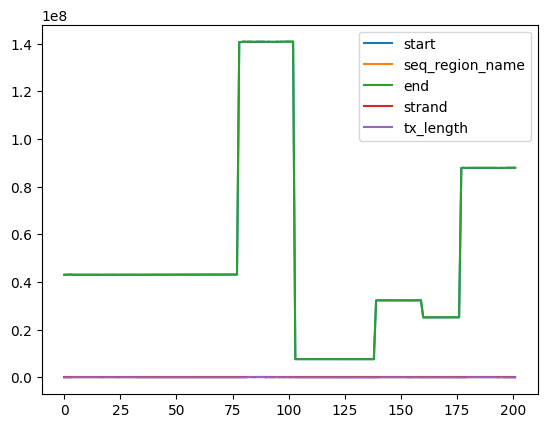

In [17]:
gene_tx_df.plot()

### Q: why were only 5 columns picked to plot?

In [38]:
gene_tx_df.dtypes[gene_tx_df.dtypes == 'int64']

start              int64
seq_region_name    int64
end                int64
strand             int64
tx_length          int64
dtype: object

#### Q: why was strand not plotted?
- see the values/unique values
- value counts

### df.plot returns
- matplotlib axes
- https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html
- contains the elements of the plot

matplotlib.axes._axes.Axes

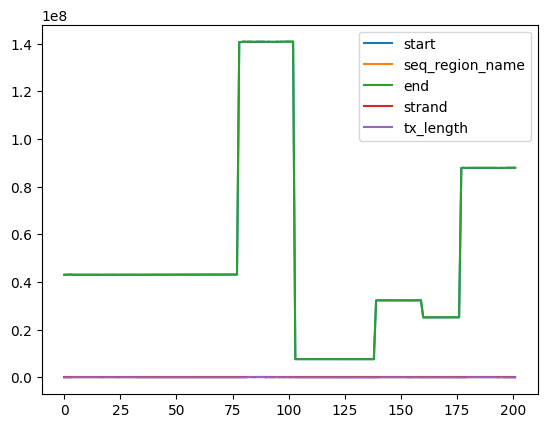

In [28]:
ax = gene_tx_df.plot()
type(ax)

### ax + plt
- matplotlib.pyplot
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#
- set yaxis scale https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yscale.html

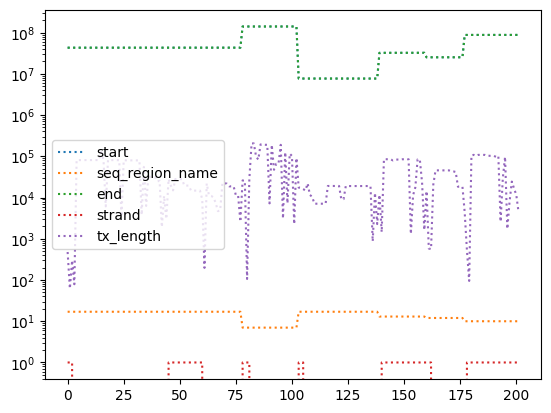

In [39]:
ax = gene_tx_df.plot(style=':')
plt.yscale('log')


### move legend to outside the plot
- bbox_to_anchor
- https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html#

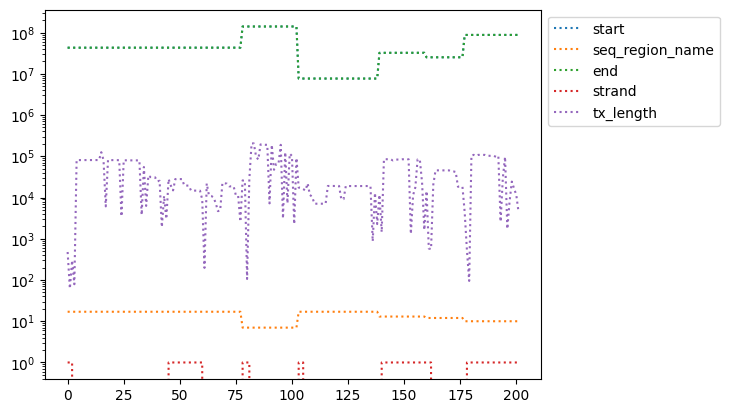

In [40]:
ax = gene_tx_df.plot(style=':', legend=False)
plt.yscale('log')
plt.legend(bbox_to_anchor=(1,1))


### Q: what was `start` not plotted?
- check for na values
- describe the column
- plot only that column (series.plot)
- compare to other columns, e.g. `end`

In [ ]:
# na values

In [46]:
gene_tx_df['start'].describe()

count    2.020000e+02
mean     5.178803e+07
std      4.029676e+07
min      7.661779e+06
25%      2.522697e+07
50%      4.304565e+07
75%      4.316945e+07
max      1.408841e+08
Name: start, dtype: float64

In [47]:
gene_tx_df['end'].describe()

count    2.020000e+02
mean     5.183434e+07
std      4.031977e+07
min      7.675119e+06
25%      2.525093e+07
50%      4.312536e+07
75%      4.317104e+07
max      1.409249e+08
Name: end, dtype: float64

In [120]:
# plot start column

In [121]:
# plot end column

<Axes: >

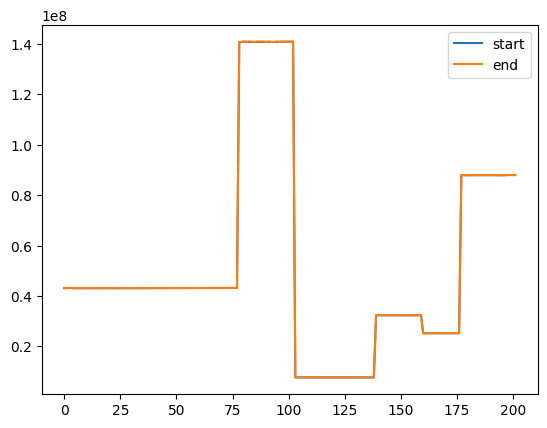

In [53]:
gene_tx_df[['start', 'end']].plot()

<Axes: >

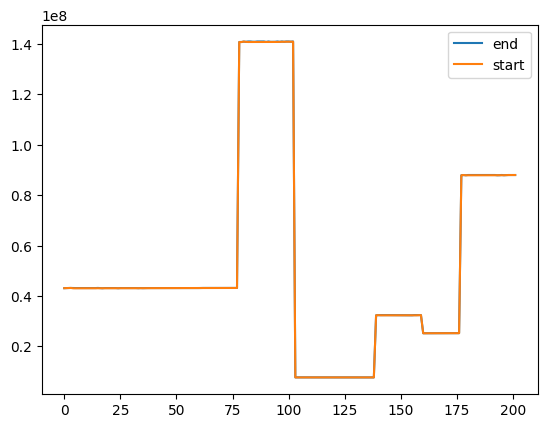

In [114]:
gene_tx_df[['end', 'start']].plot()

### df.plot.scatter
- x, y: colnames from df

<Axes: xlabel='start', ylabel='end'>

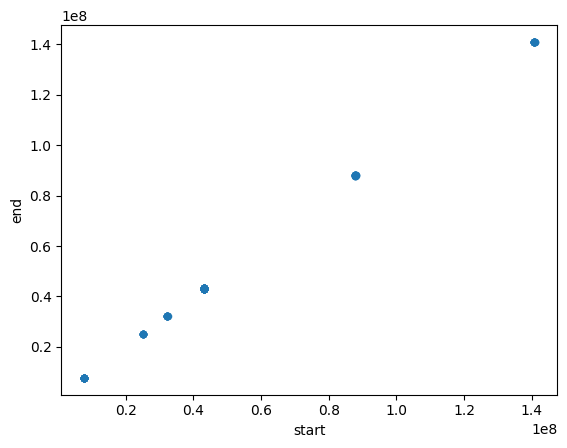

In [60]:
gene_tx_df.plot.scatter(x='start', y='end', alpha=0.5)

### Plot specific columns
- pandas series plot
- https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html#
- boolean filtering/masking and plotting
- groupby + plotting


In [63]:
gene_tx_df.columns

Index(['transcripts', 'biotype', 'start', 'id', 'external_name',
       'seq_region_name', 'end', 'strand', 'gene_name', 'tx_length',
       'jitter_start', 'jitter_end'],
      dtype='object')

### hist plot
- hist of `tx_length` 

<Axes: ylabel='Frequency'>

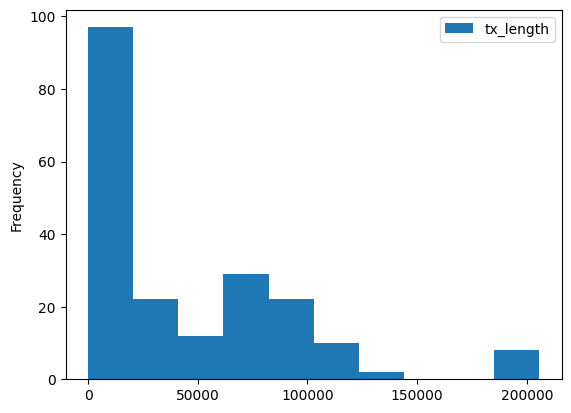

In [64]:
gene_tx_df['tx_length'].plot.hist(legend=True)

<Axes: ylabel='Frequency'>

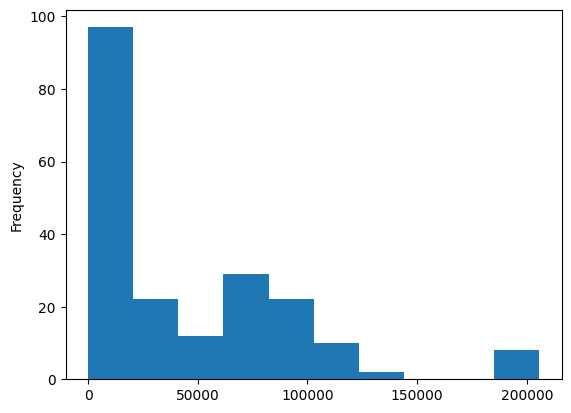

In [70]:
gene_tx_df['tx_length'].plot(kind='hist')

<Axes: title={'center': 'first series histogram'}, ylabel='Frequency'>

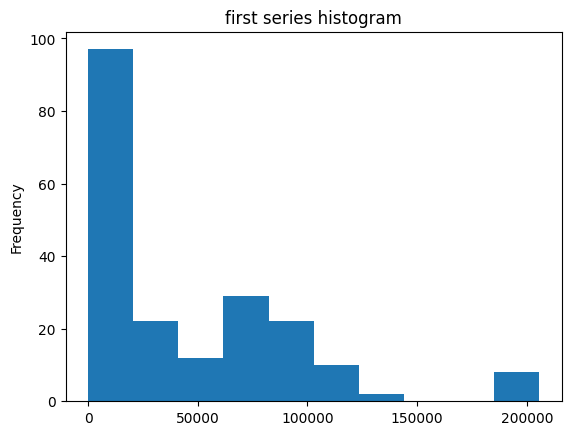

In [71]:
gene_tx_df['tx_length'].plot(kind='hist', title='first series histogram')

<Axes: title={'center': 'first series histogram'}, ylabel='Frequency'>

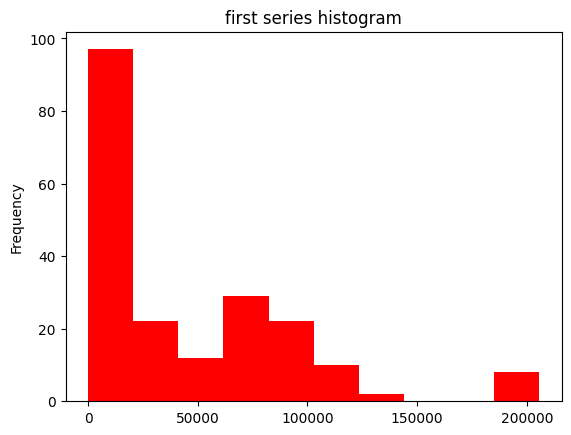

In [72]:
gene_tx_df['tx_length'].plot(kind='hist', title='first series histogram', color='red')

### hist plot with boolean masking
- plot `tx_length < 200000`

<Axes: ylabel='Frequency'>

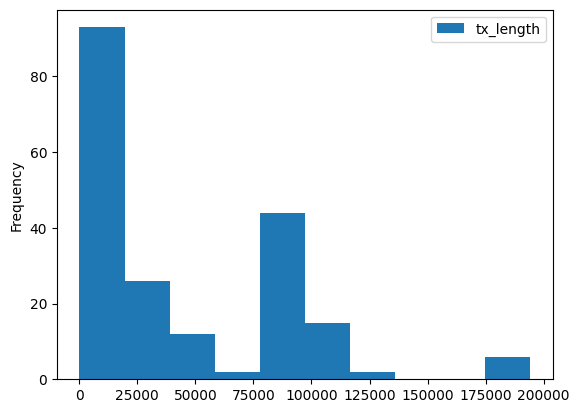

In [119]:
gene_tx_df[gene_tx_df['tx_length'] < 200000]['tx_length'].plot.hist(legend=True)

<Axes: ylabel='Frequency'>

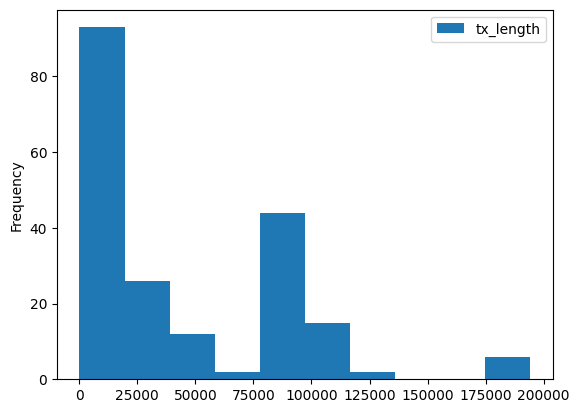

In [66]:
gene_tx_df.loc[gene_tx_df['tx_length'] < 200000]['tx_length'].plot.hist(legend=True)

<Axes: ylabel='Frequency'>

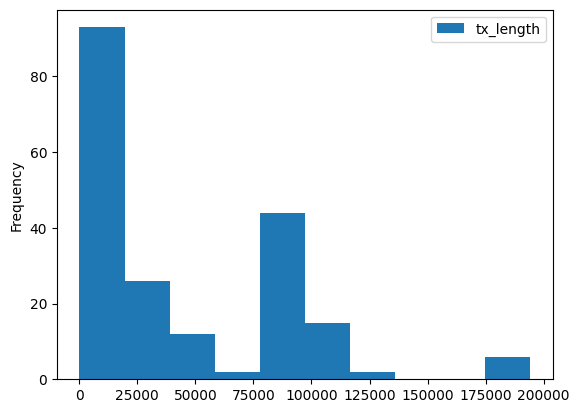

In [69]:
condition = gene_tx_df['tx_length'] < 200000
gene_tx_df.loc[condition, 'tx_length'].plot.hist(legend=True)

## groupby plots
- hist, bar, box, scatter
- plot hist of `tx_length` categorized by `gene_name`

In [73]:
gene_tx_df.groupby('gene_name')['tx_length']

In [74]:
g = gene_tx_df.groupby('gene_name')['tx_length']
g.groups

{'BRAF': [78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102], 'BRCA1': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77], 'BRCA2': [139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159], 'KRAS': [160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176], 'PTEN': [177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201], 'TP53': [103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138]}

In [76]:
for k,v in g.groups.items():
    print('{},{}\n'.format(k,v))

BRAF,Index([ 78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102],
      dtype='int64')

BRCA1,Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77],
      dtype='int64')

BRCA2,Index([139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159],
      dtype='int64')

KRAS,Index([160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
       174, 175, 176],
      dtype='int64')

PTEN,Index([177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201],
      dtype='int64')

TP53,Index([103

In [77]:
g.mean()

gene_name
BRAF     98144.840000
BRCA1    38820.512821
BRCA2    59253.952381
KRAS     31699.529412
PTEN     62457.400000
TP53     14712.972222
Name: tx_length, dtype: float64

#### groupby + hist

gene_name
BRAF     Axes(0.125,0.11;0.775x0.77)
BRCA1    Axes(0.125,0.11;0.775x0.77)
BRCA2    Axes(0.125,0.11;0.775x0.77)
KRAS     Axes(0.125,0.11;0.775x0.77)
PTEN     Axes(0.125,0.11;0.775x0.77)
TP53     Axes(0.125,0.11;0.775x0.77)
Name: tx_length, dtype: object

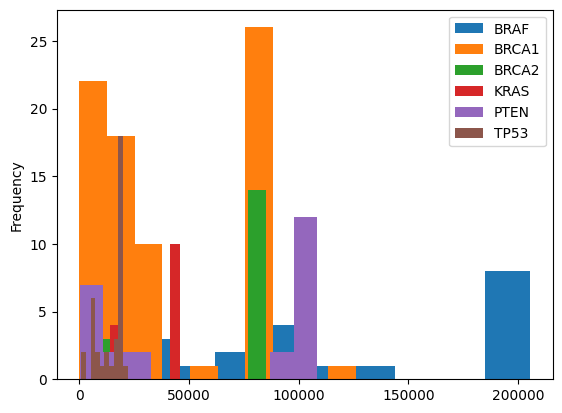

In [79]:
gene_tx_df.groupby('gene_name')['tx_length'].plot.hist(legend=True)

### Q: can you plot 
- `hist` of `tx_length` by both `gene_name` and `biotype`

### can you now plot:
- hist of `tx_length` by `biotype` for `BRCA1`

In [83]:
BRCA1_df = gene_tx_df[gene_tx_df['gene_name'] == 'BRCA1']

biotype
lncRNA                                Axes(0.125,0.11;0.775x0.77)
nonsense_mediated_decay               Axes(0.125,0.11;0.775x0.77)
processed_pseudogene                  Axes(0.125,0.11;0.775x0.77)
protein_coding                        Axes(0.125,0.11;0.775x0.77)
protein_coding_CDS_not_defined        Axes(0.125,0.11;0.775x0.77)
retained_intron                       Axes(0.125,0.11;0.775x0.77)
transcribed_processed_pseudogene      Axes(0.125,0.11;0.775x0.77)
transcribed_unprocessed_pseudogene    Axes(0.125,0.11;0.775x0.77)
unprocessed_pseudogene                Axes(0.125,0.11;0.775x0.77)
Name: tx_length, dtype: object

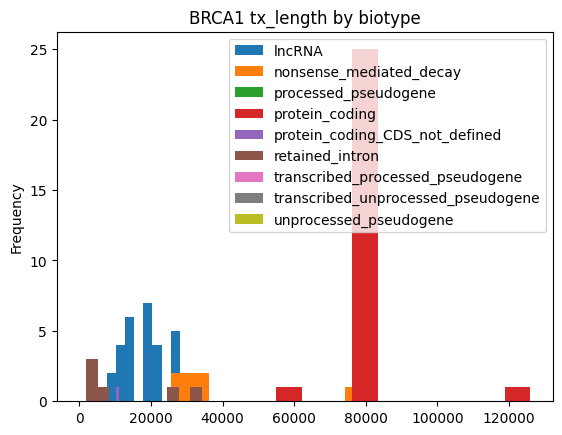

In [84]:
BRCA1_df.groupby('biotype')['tx_length'].plot.hist(legend=True, title='BRCA1 tx_length by biotype')

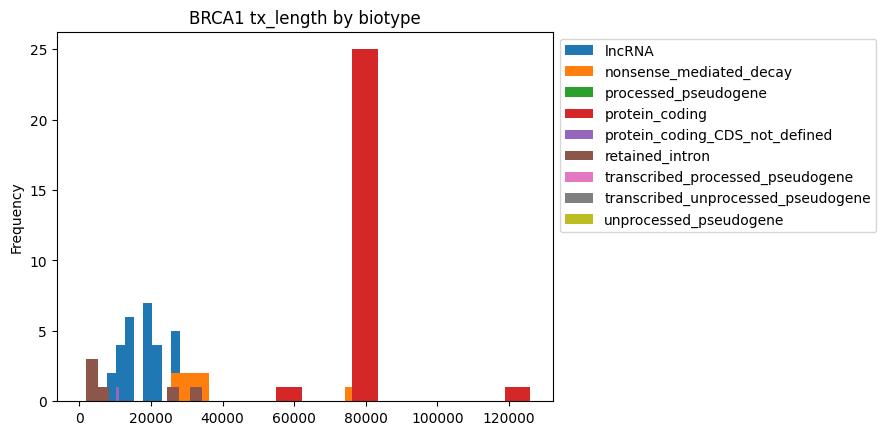

In [86]:
ax = BRCA1_df.groupby('biotype')['tx_length'].plot.hist(
    legend=False, title='BRCA1 tx_length by biotype',
)
plt.legend(bbox_to_anchor=(1,1))

### groupby + Bar plot
Plot percent protein coding transcripts for each gene
- use a custom function
- groupby gene
- get the biotype column for gene
- calculate how many protein_coding biotypes are there
- divide by the total number of biotypes

In [89]:
g = gene_tx_df.groupby('gene_name')['biotype']

In [90]:
g.groups

{'BRAF': [78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102], 'BRCA1': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77], 'BRCA2': [139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159], 'KRAS': [160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176], 'PTEN': [177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201], 'TP53': [103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138]}

In [91]:
gene_tx_df.loc[78]

transcripts            transcript_0
biotype              protein_coding
start                     140696671
id                  ENST00000476279
external_name            NDUFB2-212
seq_region_name                   7
end                       140722790
strand                            1
gene_name                      BRAF
tx_length                     26119
jitter_start       140696670.882571
jitter_end         140722789.889302
Name: 78, dtype: object

#### Q: can you access all BRAF rows using
- g.groups
- df.loc

In [93]:
def cal_pct_protein_coding(biotype_ser):
    return biotype_ser.str.contains('protein_coding').sum()/len(biotype_ser) * 100

In [95]:
gene_tx_df.groupby('gene_name')['biotype'].agg(cal_pct_protein_coding)

gene_name
BRAF     40.000000
BRCA1    38.461538
BRCA2    38.095238
KRAS     58.823529
PTEN     40.000000
TP53     91.666667
Name: biotype, dtype: float64

<Axes: title={'center': 'percent protein_coding transcripts'}, xlabel='gene_name'>

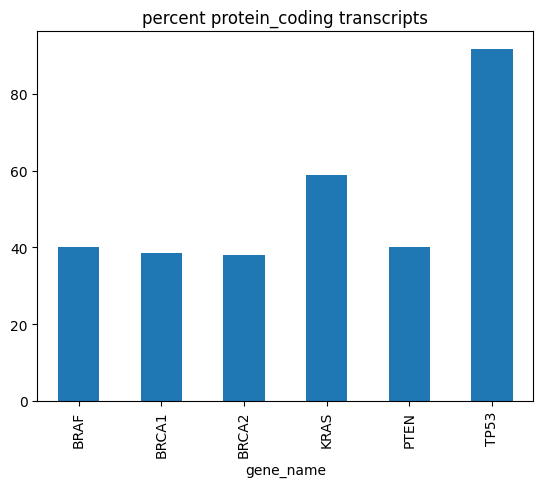

In [96]:
gene_tx_df.groupby('gene_name')['biotype'].agg(cal_pct_protein_coding).plot.bar(
    title='percent protein_coding transcripts'
)

### groupby + horizontal bar plot 
- plot.barh()

<Axes: title={'center': 'percent protein_coding transcripts'}, ylabel='gene_name'>

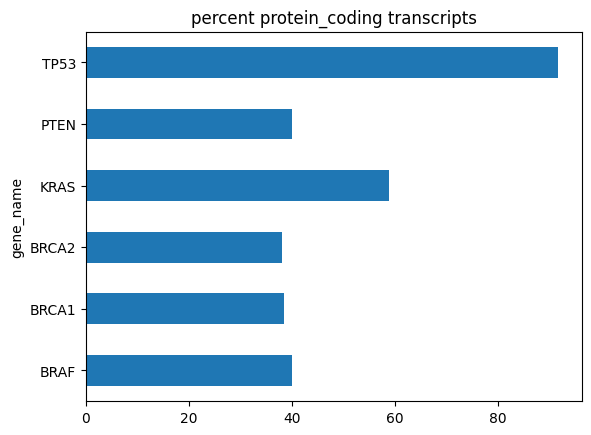

In [97]:
gene_tx_df.groupby('gene_name')['biotype'].agg(cal_pct_protein_coding).plot.barh(
    title='percent protein_coding transcripts'
)

### groupby + bar plot  (e.g. 2)
- number of transcripts per gene

In [116]:
gene_tx_df.head()

,transcripts,biotype,start,id,external_name,seq_region_name,end,strand,gene_name,tx_length,jitter_start,jitter_end
0,transcript_0,processed_pseudogene,43079302,ENST00000497954,RPL21P4-201,17,43079780,1,BRCA1,478,4.307930e+07,4.307978e+07
1,transcript_1,transcribed_unprocessed_pseudogene,43131208,ENST00000587322,NaN,17,43131270,1,BRCA1,62,4.313121e+07,4.313127e+07
2,transcript_2,transcribed_processed_pseudogene,43144956,ENST00000464237,NaN,17,43145255,1,BRCA1,299,4.314496e+07,4.314526e+07
3,transcript_3,unprocessed_pseudogene,43168170,ENST00000589464,BRCA1P1-201,17,43168249,-1,BRCA1,79,4.316817e+07,4.316825e+07
4,transcript_4,protein_coding,43044295,ENST00000497488,BRCA1-222,17,43125300,-1,BRCA1,81005,4.304429e+07,4.312530e+07


In [98]:
gene_tx_df.groupby('gene_name')['transcripts'].agg('count')

gene_name
BRAF     25
BRCA1    78
BRCA2    21
KRAS     17
PTEN     25
TP53     36
Name: transcripts, dtype: int64

<Axes: xlabel='gene_name'>

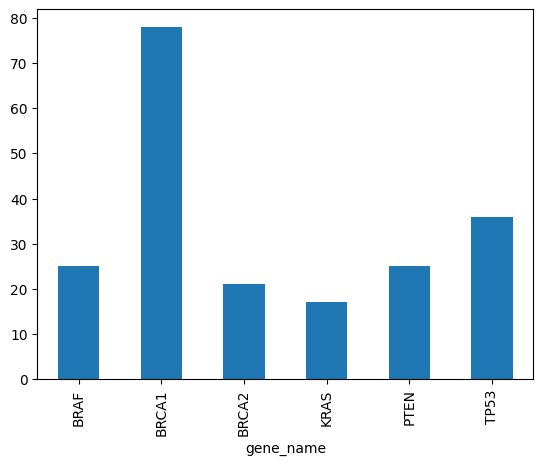

In [99]:
gene_tx_df.groupby('gene_name')['transcripts'].agg('count').plot.bar()

### Q: can you make a bar plot of
- number of transcripts grouped by biotype and gene
- another plot with color=red

### groupby + scatter plot 
- plot `tx_length` by `gene_name`
- restrict to `protein_coding` biotype

In [117]:
gene_tx_df[gene_tx_df['biotype'] == 'protein_coding'].groupby('gene_name')['tx_length'].agg('count')

gene_name
BRAF      7
BRCA1    27
BRCA2     8
KRAS     10
PTEN      9
TP53     31
Name: tx_length, dtype: int64

<Axes: xlabel='gene_name', ylabel='tx_length'>

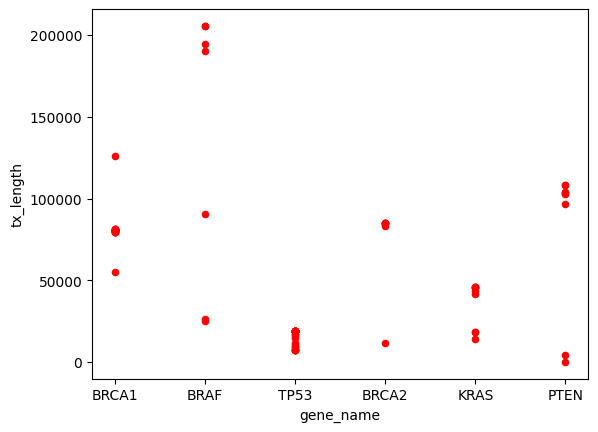

In [118]:
gene_tx_df[gene_tx_df['biotype'] == 'protein_coding'].plot.scatter(x='gene_name', y='tx_length',color='red')

### box plot 
- plot `tx_length` versus `gene_name` 
- restrict to `protein_coding` biotype

tx_length    Axes(0.125,0.11;0.775x0.77)
dtype: object

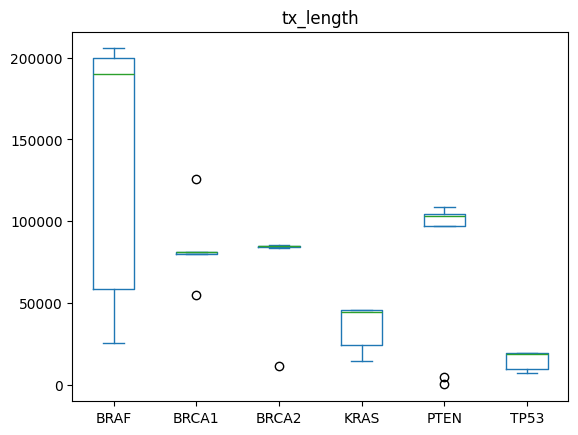

In [105]:
gene_tx_df[gene_tx_df['biotype'] == 'protein_coding'].plot.box(column='tx_length', by='gene_name')

### separated hist plots 
- `tx_length` versus `gene_name`
- show hist of each gene separately

array([<Axes: title={'center': 'BRAF'}, ylabel='Frequency'>,
       <Axes: title={'center': 'BRCA1'}, ylabel='Frequency'>,
       <Axes: title={'center': 'BRCA2'}, ylabel='Frequency'>,
       <Axes: title={'center': 'KRAS'}, ylabel='Frequency'>,
       <Axes: title={'center': 'PTEN'}, ylabel='Frequency'>,
       <Axes: title={'center': 'TP53'}, ylabel='Frequency'>], dtype=object)

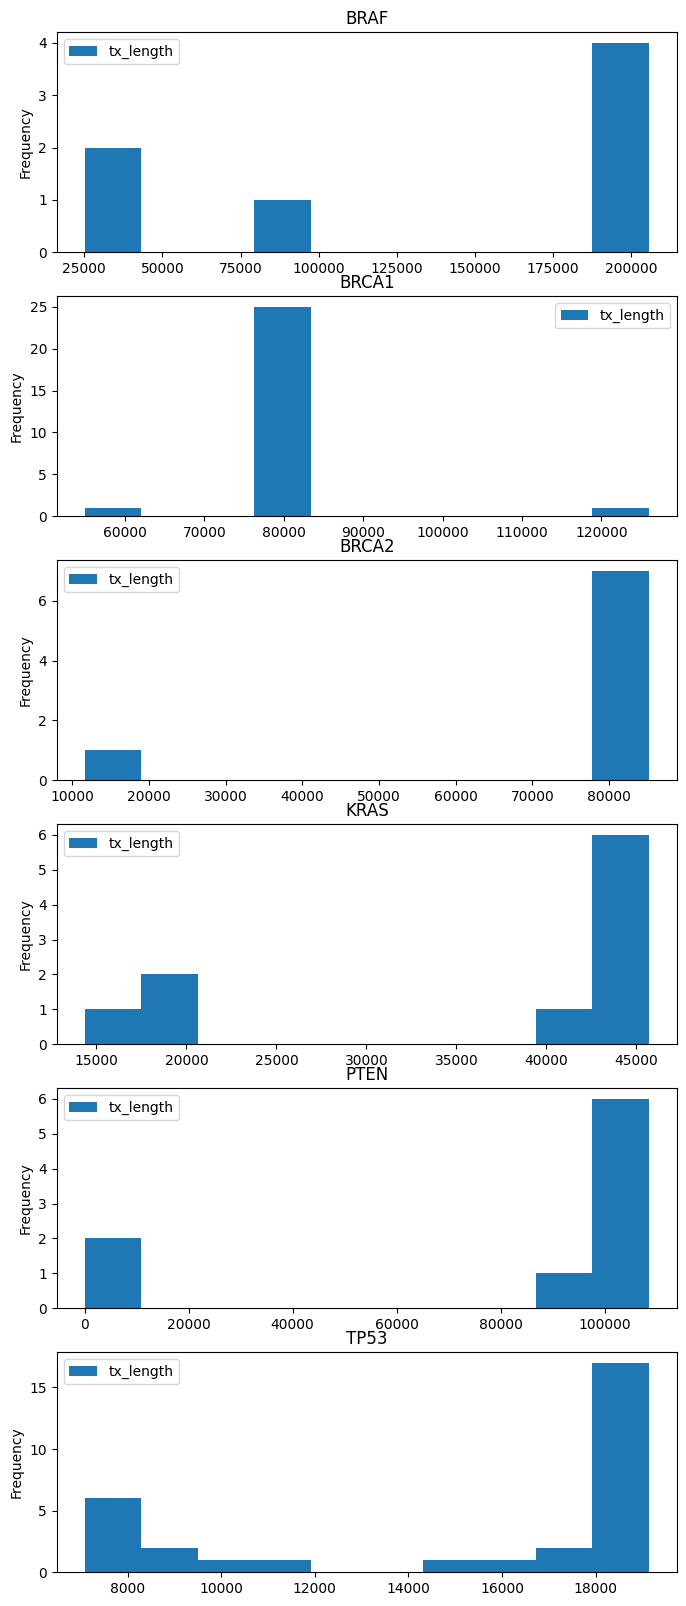

In [119]:
gene_tx_df[gene_tx_df['biotype'] == 'protein_coding'].plot.hist(
    column='tx_length', by='gene_name', figsize=(8, 20))

# Collaborative Exercises

## Exercise 1
- Can you make a scatterplot of `tx_length` by `gene_name` with all biotypes included?
- Now make a scatterplot of `tx_length` by `gene_name`, colored by `biotype`. Hint: For this, one way is to map each biotype to a color, and pass these colors to `df.plot.scatter` using the `c=` arg that specifies a color for each point. See link below for more details:
https://pandas.pydata.org/pandas-docs/version/0.25/reference/api/pandas.DataFrame.plot.scatter.html
- Make the same plot as above, except convert the y-axis to a log10 scale
